# Stock market analysis using data from the Yahoo-Finance Web API

## Libraries and settings

In [10]:
# Libraries
import os
import pandas as pd
import yfinance as yf
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/workspaces/data_analytics/GK/Week_04


## 1.) Get data for the stock TSLA (Tesla) from Yahoo Finance

In [11]:
# Retrieve the TESLA stock data from Yahoo finance
today = datetime.now().strftime("%Y-%m-%d")
print('Today is:', today)

df = yf.download('TSLA', start = "2022-01-01", end = today, progress=False)
df

Today is: 2023-10-09


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700
...,...,...,...,...,...,...
2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,123810400
2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300
2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600


## 2.) Apply non-graphical Exploratory Data Analysis (EDA) methods

### a) What are the values for min, max. mean and median of the close price?

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,443.000000,443.000000,443.000000,443.000000,443.000000,4.430000e+02
mean,241.199827,246.859451,235.029496,240.886373,240.886373,1.110795e+08
std,59.040691,60.119418,57.420470,58.543233,58.543233,4.325570e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,193.575005,197.584999,189.440002,194.150002,194.150002,7.914220e+07
50%,244.353333,250.663330,239.176666,244.119995,244.119995,1.017529e+08
75%,282.931656,288.575012,275.774994,282.710007,282.710007,1.355124e+08
max,396.516663,402.666656,378.679993,399.926666,399.926666,3.065906e+08


### b) What is the 10% Quantile and 90% quantile of close price?

In [13]:
df.quantile(q=[0.10, 0.90]).round(2)

,Open,High,Low,Close,Adj Close,Volume
0.1,167.5,171.45,164.00,167.83,167.83,62582320.0
0.9,310.8,315.09,301.82,309.27,309.27,170518780.0


## 3.) Apply graphical Exploratory Data Analysis (EDA) methods

### a) Plot a line chart of the close price

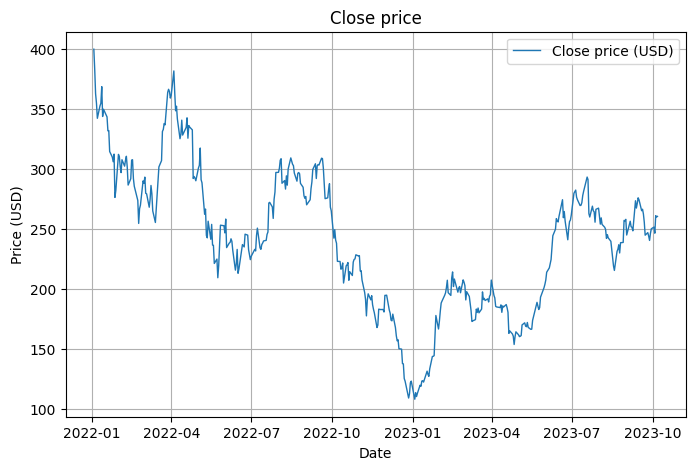

In [14]:
# Create the plot
plt.figure(figsize=(8, 5))

# Set the title and axis labels
plt.title('Close price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.plot(df.Close, lw=1.0, label='Close price (USD)')

# Add a legend to the axis
plt.legend()

# Add grid
plt.grid()

plt.show()

### b) Plot a histogram of the close price

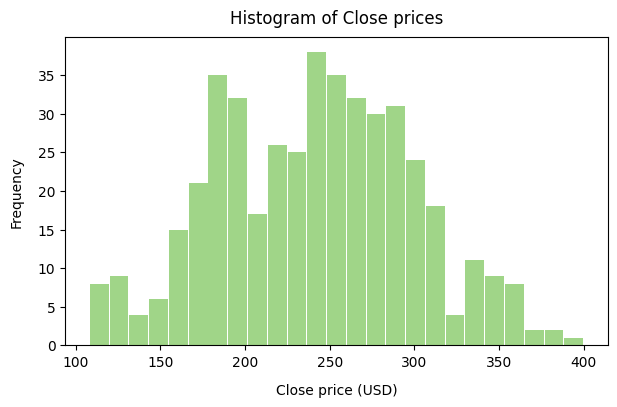

In [15]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))

n, bins, patches = plt.hist(x=df['Close'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )

# Plot settings
plt.xlabel('Close price (USD)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of Close prices', fontsize=12, pad=10)

# Show plot
plt.show()

### c) Plot a boxplot of the close price

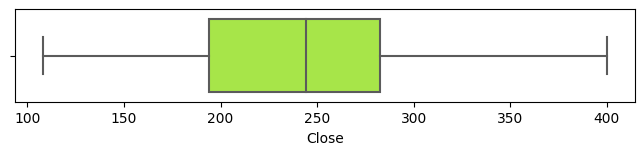

In [16]:
# Plot Boxplot
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['Close'], color="greenyellow")

# Show plot
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [17]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 5.15.0-1041-azure
Datetime: 2023-10-09 09:41:52
Python Version: 3.10.13
-----------------------------------
